!conda install pytorch torchvision torchaudio -c pytorch -y

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
    
model = LinearRegressionModel(1, 1)

In [2]:
x = torch.tensor([[1.], [2.], [3.], [4.], [5.], [6.], [7.], [8.], [9.]], requires_grad=True)
y = torch.tensor([[11.], [22.], [33.], [44.], [53.], [66.], [77.], [87.], [95.]], requires_grad=True)

In [3]:
print(x.shape)
print(y.shape)

torch.Size([9, 1])
torch.Size([9, 1])


In [4]:
learning_rate = 0.01
nb_epochs = 300
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [5]:
for epoch in range(nb_epochs + 1):  
    pred = model(x)
    loss = F.mse_loss(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, nb_epochs, loss)

0 300 tensor(3182.6868, grad_fn=<MseLossBackward0>)
100 300 tensor(1.0603, grad_fn=<MseLossBackward0>)
200 300 tensor(1.0601, grad_fn=<MseLossBackward0>)
300 300 tensor(1.0600, grad_fn=<MseLossBackward0>)


In [6]:
print(loss)
print([param for param in model.parameters()])

tensor(1.0600, grad_fn=<MseLossBackward0>)
[Parameter containing:
tensor([[10.6866]], requires_grad=True), Parameter containing:
tensor([0.7850], requires_grad=True)]


In [7]:
pred_y = model(torch.tensor([9.5]))
print(pred_y)

tensor([102.3077], grad_fn=<AddBackward0>)


In [9]:
import pandas as pd
data = pd.read_csv('dataset/Iris.csv', encoding='latin1')

print(len(data))
print(data[:5])

150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


<AxesSubplot:>

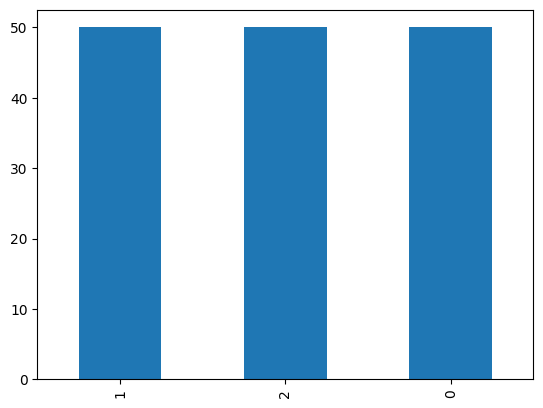

In [10]:
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [11]:
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

In [13]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

120 30 120 30


In [15]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).float()
y_test_tensor = torch.from_numpy(y_test).float()

print(X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape)

torch.Size([120, 4]) torch.Size([30, 4]) torch.Size([120]) torch.Size([30])
